# Búsquedas informadas y no informadas
## [Introducción a los Sistemas Inteligentes](https://fagonzalezo.github.io/iis-2018-1/)
## Universidad Nacional de Colombia, Bogotá

---

Las siguientes instrucciones instalan las librerías y archivos necesarios para el notebook.

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install -q graphviz

In [2]:
!wget https://raw.githubusercontent.com/aimacode/aima-python/master/search.py
!wget https://raw.githubusercontent.com/aimacode/aima-python/master/utils.py

--2018-02-28 21:24:30--  https://raw.githubusercontent.com/aimacode/aima-python/master/search.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51832 (51K) [text/plain]
Saving to: ‘search.py.1’

search.py.1         100%[===================>]  50.62K  --.-KB/s    in 0.01s   

2018-02-28 21:24:30 (3.49 MB/s) - ‘search.py.1’ saved [51832/51832]

--2018-02-28 21:24:31--  https://raw.githubusercontent.com/aimacode/aima-python/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22776 (22K) [text/plain]
Saving to: ‘utils.py.1’

utils.

In [0]:
# Libraries and code for graph and tree visualization
from graphviz import Graph, Digraph
from IPython.display import display

from graphviz import Graph, Digraph
from IPython.display import display

class search_tree():
    def __init__(self):
        self.graph = Digraph(graph_attr = {'size':'9'})
        
    def addNode(self, name, label):
        self.graph.node(name, label)

    def addEdge(self, source, action, target):
        self.graph.edge(source, target, action)
    
    def getDot(self):
        return self.graph
    
def graphDot(g_prob, color):
    dot = Graph(graph_attr = {'size':'3.5'})
    for node in g_prob.G:
        if not node in color:
            dot.node(node)
        else:
            dot.node(node, style = 'filled', color = color[node])
    for n1 in g_prob.G:
        for n2 in g_prob.G[n1]:
            if n1 < n2:
                dot.edge(n1, n2)
    return dot

## Búsquedas no informadas

### Un problema de búsqueda

Vamos a definir un problema de búsqueda extendiendo la clase `Problem` en el módulo `search.py` https://github.com/aimacode/aima-python/blob/master/search.py 

In [0]:
import utils
import search


class graph_problem(search.Problem):
    def __init__(self, vertices, edges):
        super().__init__(vertices[0], vertices[-1])
        self.G = {v:{} for v in vertices}
        for v1, v2, c in edges1:
            (self.G[v1])[v2] = c
            (self.G[v2])[v1] = c
        
    def getStartState(self):
        return self.initial

    def actions(self, state):
        """Return the actions that can be executed in the given
        state."""      
        successors = [suc for suc in self.G[state]]
        return successors
  
    def result(self, state, action):
        """Return the state that results from executing the given
        action in the given state. The action must be one of
        self.actions(state)."""
        return action

In [0]:
edges1 = [('v', 'r', 1), ('r', 's', 1), ('w', 't', 1),('s','w', 1),
         ('w', 'x', 1), ('t', 'x', 1), ('t', 'u', 1), ('x', 'y', 1),
         ('u', 'y', 1)]
vertices1 = ['s', 'r', 't', 'u', 'v', 'w', 'x', 'y'] 
problem1 = graph_problem(vertices1, edges1)

True


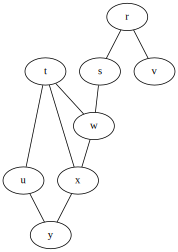

In [7]:
print(problem1.goal_test('y'))
dot = graphDot(problem1, {})
display(dot)

## Función general de búsqueda no informada

In [0]:
def general_ui_search(problem, frontier):
    visited = {}
    tree = search_tree()
    state = problem.getStartState()
#    display(graphDot(problem, visited))
    frontier.append((state, []))
    visited[state] = 'gray'
    while frontier:
        u, actions = frontier.pop()
#        print('Pop:', u )
        if problem.goal_test(u):
            return  actions, tree
        for action in problem.actions(u):
            v = problem.result(u, action)
            if not v in visited:
                tree.addEdge(str(u), str(action), str(v))
                visited[v] = 'gray'
                frontier.append((v, actions + [action]))
#            display(graphDot(problem, visited))
#            display(tree.getDot())
        visited[u] = 'black'
    return [], tree

## Búsqueda en profundidad (dfs) y en amplitud (bfs)

In [0]:
def dfs(problem):
   return general_ui_search(problem, search.Stack())

def bfs(problem):
   return general_ui_search(problem, search.FIFOQueue())

['w', 'x', 'y']


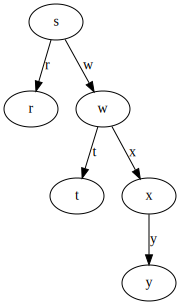

In [17]:
actions, tree = dfs(problem1)
print(actions)
display(tree.getDot())

['w', 'x', 'y']


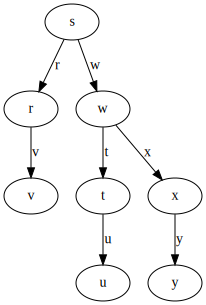

In [12]:
actions, tree = bfs(problem1)
print(actions)
display(tree.getDot())

# Búsqueda informada

La siguiente función define un algoritmo genérico de búsqueda

In [0]:
def general_search(problem, frontier):
    visited = {}
    state = problem.getStartState()
    frontier.append((state, [], 0))
    tree = search_tree()
    tree.addNode(str(state)+"[]",str(state))
    while frontier: # Repita mientras hay elementos en la frontera
        u, actions, path_cost = frontier.pop()
        if problem.goal_test(u):
            return  actions, tree
        if not u in visited:
            for action in problem.actions(u):
                v = problem.result(u, action)
                new_path_cost = problem.path_cost(path_cost, u, action, v)
                cost = new_path_cost - path_cost
                #print(v, cost, action)
                tree.addNode(str(v) + str(actions+[action]), str(v))
                tree.addEdge(str(u) + str(actions), str(cost), str(v) + str(actions+[action]))
                frontier.append((v, actions + [action], path_cost + cost))
        visited[u] = 'black'
    return [], tree

## El problema de los pancakes

In [0]:
def flip(alist, i):
    return alist[i::-1] + alist[i+1:]

class pancakes_problem(search.Problem):
    def __init__(self, start):
        super().__init__(tuple(start))
        self.expanded = 0
        
    def getStartState(self):
        return self.initial

    def goal_test(self, state):
        return tuple(state) == tuple(range(1,len(self.initial)+1))

    def actions(self, state):
        successors = list(range(1,len(state)))
        return successors

    def result(self, state, action):
        self.expanded += 1
        return tuple(flip(state, action))
                          
    def path_cost(self, c, state1, action, state2):
        return c + action + 1

In [0]:
problem2 = pancakes_problem([3,4,1,2])

In [60]:
problem2.goal_test([1,2,3,4])

True

[1, 3, 1]


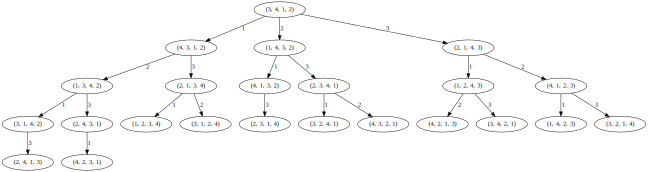

In [61]:
actions, tree = bfs(problem2)
print(actions)
display(tree.getDot())

## Búqueda de costo uniforme

In [0]:
def uniformCostSearch(problem):
    def g_cost(item):
        return item[2]
    return general_search(problem, utils.PriorityQueue(f = g_cost))

[1, 3, 1]


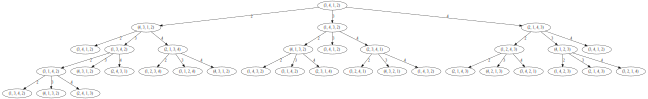

In [73]:
actions, tree = uniformCostSearch(problem2)
print(actions)
display(tree.getDot())

In [74]:
problem3 = pancakes_problem([3,4,1,2,6,5])
actions, tree = uniformCostSearch(problem3)
print(actions)
print(problem3.expanded)

[1, 4, 5, 4, 1]
2290


## Búsqueda A*

In [0]:
def nullHeuristic(state):
    return 0

def aStarSearch(problem, heuristic=nullHeuristic):
    def f_cost(item):
        return item[2] + heuristic(item[0]) 
    return general_search(problem, utils.PriorityQueue(f = f_cost))

In [84]:
problem3 = pancakes_problem([3,4,1,2,5])
actions, tree =aStarSearch(problem3)
print(actions)
print(problem3.expanded)

[1, 3, 1]
56


In [0]:
def largestHeuristic(state):
    return max([i+1 for i in range(len(state)) if state[i] != i + 1] + [0])


[1, 3, 1]
16


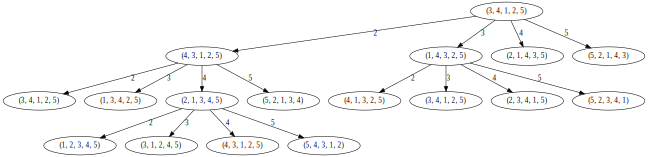

In [83]:
problem3 = pancakes_problem([3,4,1,2,5])
actions, tree =aStarSearch(problem3, largestHeuristic)
print(actions)
print(problem3.expanded)
display(tree.getDot())